 ##### Sentiment analysis is the interpretation and classification of text-based data. The point of this analysis is to categorize each data-point into a class that represents its quality (positive, negative, etc.). Sentiment analysis focuses on the polarity, emotions, and intentions of authors. Classic sentiment analysis consists of the following steps: preprocessing, training, feature extraction,and classification.

### Importing data from sqlite database

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sqlite3

In [5]:
con= sqlite3.connect(r"C:\Users\dines\Downloads\database.sqlite")

In [6]:
df= pd.read_sql_query('SELECT* FROM Reviews',con)

In [7]:
df.shape

(568454, 10)

In [8]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [9]:
df['HelpfulnessNumerator']>df['HelpfulnessDenominator'] ##invalid row

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

## Preprocessing and cleaning of data

In [10]:
df[df['HelpfulnessNumerator']>df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [11]:
df_valid=df[df['HelpfulnessNumerator']<=df['HelpfulnessDenominator']]

In [12]:
df_valid.shape

(568452, 10)

In [13]:
df_valid.duplicated(['UserId','ProfileName','Time','Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [14]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time','Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [15]:
data=df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [16]:
data.shape

(393931, 10)

In [17]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [18]:
data['Time']=pd.to_datetime(data['Time'],unit='s')

C:\Users\dines\AppData\Local\Temp\ipykernel_7236\796006669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time']=pd.to_datetime(data['Time'],unit='s')


In [19]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

 ### What is sentiment analysis?
    Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text
    Some examples of applications for sentiment analysis include:

    1.Analyzing the social media discussion around a certain topic
    2.Evaluating survey responses
    3.Determining whether product reviews are positive or negative

    Sentiment analysis is not perfect.It also cannot tell you why a writer is feeling a certain way. However, it can be useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot analyze it.For this project,the goal is to to classify Food reviews based on customers' text.

In [20]:
!pip install TextBlob


In [21]:
from textblob import TextBlob


In [22]:
text=data['Summary'][0]

In [23]:
text

'Good Quality Dog Food'

In [24]:
TextBlob(text).sentiment.polarity

0.7

In [25]:
data.shape

(393931, 10)

In [26]:
sample=data[0:50000]

In [27]:
polarity=[]

for text in sample['Summary']:
    try:
        polarity.append( TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [28]:
len(polarity)

50000

In [29]:
sample['polarity']=polarity

In [30]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,0.8


In [31]:
sample_negative=sample[sample['polarity']<0]
sample_positive=sample[sample['polarity']>0]

In [32]:
from collections import Counter

In [33]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [34]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]

## Exploratory Data Analysis

#### Amazon can recommend more products to only those who are going to buy more or to one who has a better conversion rate,so lets ready data according to this problem statement



In [35]:
df['UserId'].nunique()

256059

In [36]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [37]:
raw=df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending=False)

In [38]:
raw

,Summary,Text,Score,ProductId
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [39]:
raw.columns=['no_of_summary','num_text','avg_score','no_of_prod_purchased']
raw

,no_of_summary,num_text,avg_score,no_of_prod_purchased
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [40]:
user_10=raw.index[0:10]

In [41]:
num_10=raw['no_of_prod_purchased'][0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

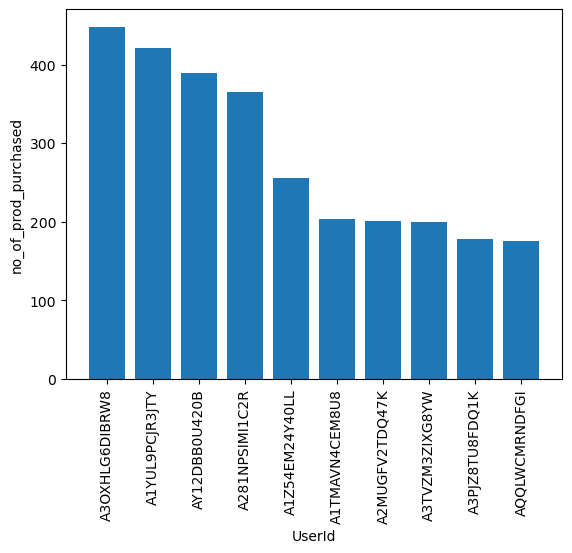

In [42]:
plt.bar(user_10,num_10,label='most recommended user')
plt.xlabel('UserId')
plt.ylabel('no_of_prod_purchased')
plt.xticks(rotation='vertical')

#### These are the Top 10 Users so we can recommend more & more Prodcuts to these Usser Id as there will be a high probability that these person are going to be buy more




### Which Product has a good number of reviews

In [43]:
data['ProductId'].nunique()

67624

In [44]:
prod_count=data['ProductId'].value_counts().to_frame()

In [45]:
prod_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


In [46]:
prod_count[prod_count['ProductId']>500]

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


In [47]:
freq_prod_ids=prod_count[prod_count['ProductId']>500].index

In [48]:
data['ProductId'].isin(freq_prod_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [49]:
freq_prod_df=data[data['ProductId'].isin(freq_prod_ids)]

In [50]:
freq_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [51]:
freq_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='ProductId'>

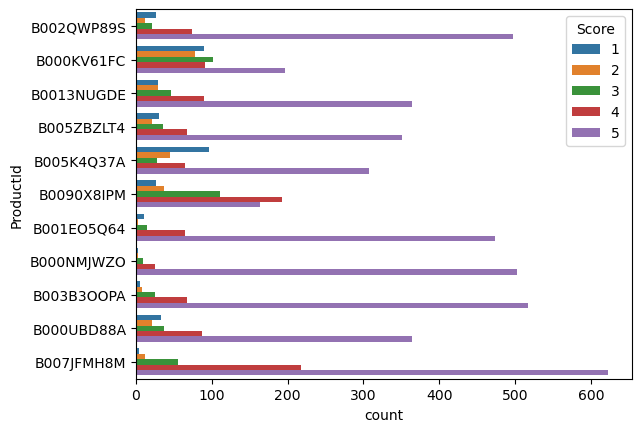

In [52]:
sns.countplot(y='ProductId', data=freq_prod_df, hue='Score')

### IS there any difference between behaviour of frequent user and not frequent user?

In [66]:
x=data['UserId'].value_counts()

In [67]:
x

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2O8OFVSTO9PF3      1
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [68]:
data['viewer_type']=data['UserId'].apply(lambda user: 'Frequent' if x[user]>50 else 'Not Frequent')

In [69]:
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8,Not Frequent


In [70]:
not_freq_viewer=data[data['viewer_type']=='Not Frequent']
freq_viewer=data[data['viewer_type']=='Frequent']

In [71]:
freq_viewer['Score'].value_counts()/len(freq_viewer)*100

5    58.850870
4    20.871143
3    10.344828
1     5.422513
2     4.510646
Name: Score, dtype: float64

In [72]:
not_freq_viewer['Score'].value_counts()/len(not_freq_viewer)*100

5    64.086960
4    13.911916
1     9.350881
3     7.383354
2     5.266889
Name: Score, dtype: float64

<AxesSubplot:>

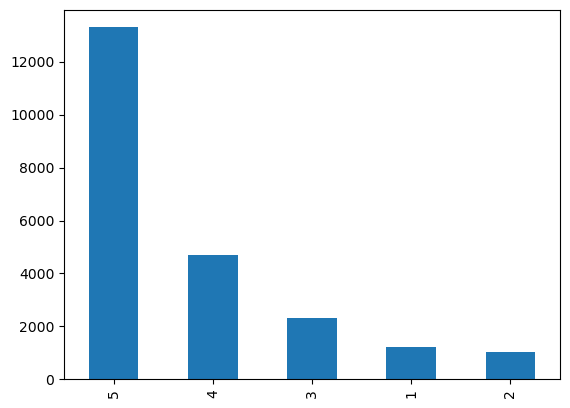

In [73]:
freq_viewer['Score'].value_counts().plot(kind='bar')

<AxesSubplot:>

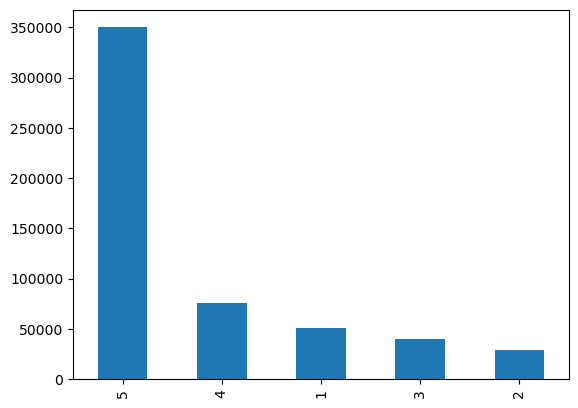

In [74]:
not_freq_viewer['Score'].value_counts().plot(kind='bar')

### The distribution of ratings among frequent reviewers is similar to that of all reviews. 
### However, we can see that frequent reviewers give less 5-star reviews and less 1-star review.
### Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews.

## Are frequent users more verbose?

In [75]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [76]:
type(data['Text'][0])

str

In [77]:
type(data['Text'][0].split(' '))

list

In [78]:
len(data['Text'][0].split(' '))

49

In [79]:
def calculate_len(text):
    return len(text.split(' '))

In [80]:
data['Text_lenght']=data['Text'].apply(calculate_len)

In [81]:
not_freq_data=data[data['viewer_type']=='Not Frequent']
freq_data=data[data['viewer_type']=='Frequent']

In [82]:
not_freq_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity,viewer_type,Text_lenght
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.70,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.00,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.00,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.00,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.80,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.00,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-0.75,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.00,Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0.50,Not Frequent,37


Text(0.5, 0, 'frequency of not frequent reviewers')

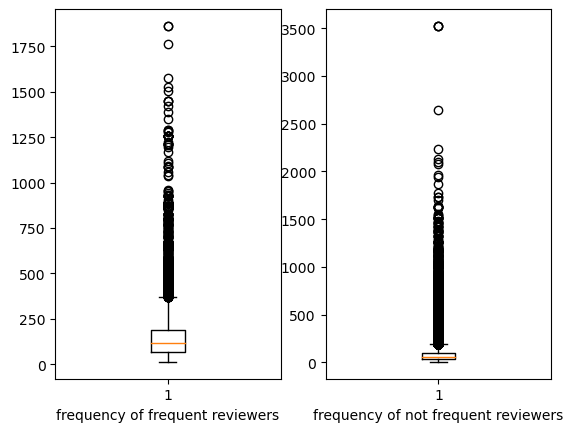

In [83]:
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.boxplot(freq_data['Text_lenght'])
ax1.set_xlabel('frequency of frequent reviewers')

ax2=fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_lenght'])
ax2.set_xlabel('frequency of not frequent reviewers')


#### The distributions of word counts for frequent and infrequent reviews shows that 
#### infrequent reviewers have a large amount of reviews of low word count.
#### On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. 
